# CS4035 - Cyber Data Analytics
## Lab 2 

### Submit on brightspace (zip file with the name Group_xx.zip)
(i) This jupyter file completed with code, plots, figures and report for each question. Additional plots and figures can be created for explanation before the end of each main question. Lab 2 contains 7 main questions, including the bonus. Write the code or explanation below each sub question. For the explantions, include what you would normally include in the report for this lab assignment, for example data pre-processing, hypothesis tested, approach, results, etc.
(ii) A PDF or a Word report for the assignment. Create a report from the plots, figures, tables and the write-up that you provide in this jupyter file. The report will be used as a proof for page limit. 
(iii) The libraries needed to run this file. 

Your peers should be able to use the readme section for instructions and be able to run this file. 


## Group Number : 69

## Student 1 
### Name : Konrad Ponichtera
### ID : 5580749

## Student 2
### Name : Ion Babalau
### ID : 5626110

## Readme - Provide instructions - libraries used, location of the data file, etc. Keep it short. Remember your peers will not debug your code and should be able to reproduce the exact output you provide.

Expected location of dataset: _data_ directory, in same directory as notebook. 
All the necessary packages are specifeid in _requirements.txt_, and can be installed with the command: `pip install -r requirements.txt`

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler

## 1. Familiarization task

### 1a. Plot visualizations

#### Reading data set

In [2]:
df = pd.read_csv("data/train_data.csv")
df.head()

,Id,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Label
0,0,22/12/2015 4:00:00 PM,2.470294,261.5804,2,2,1,244.3284,8.19008,306.101,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,0
1,1,22/12/2015 4:00:01 PM,2.457163,261.1879,2,2,1,244.3284,8.19008,306.101,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,0
2,2,22/12/2015 4:00:02 PM,2.439548,260.9131,2,2,1,244.3284,8.19008,306.101,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,0
3,3,22/12/2015 4:00:03 PM,2.428338,260.2850,2,2,1,244.3284,8.19008,306.101,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,0
4,4,22/12/2015 4:00:04 PM,2.424815,259.8925,2,2,1,244.4245,8.19008,306.101,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,0


In [3]:
df.describe()

,Id,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Label
count,496800.000000,496800.000000,496800.00000,496800.000000,496800.000000,496800.0,496800.00000,496800.000000,496800.000000,496800.000000,...,496800.000000,496800.0,496800.000000,496800.000000,496800.000000,496800.000000,496800.0,496800.000000,496800.0,496800.0
mean,248399.500000,1.844964,586.09884,1.718364,1.746860,1.0,263.73899,8.387852,348.230699,1.828534,...,1.993281,1.0,250.927892,1.183117,190.271470,0.014376,1.0,1.007915,1.0,0.0
std,143413.951204,1.135332,123.89144,0.458669,0.434811,0.0,4.83595,0.090236,49.422251,1.062482,...,0.081694,0.0,19.699763,0.216984,15.286211,0.148666,0.0,0.088612,0.0,0.0
min,0.000000,0.000000,120.62370,0.000000,1.000000,1.0,244.32840,8.190080,300.845900,0.000000,...,1.000000,1.0,8.891951,0.000000,3.108177,0.000000,1.0,1.000000,1.0,0.0
25%,124199.750000,0.000000,508.24470,1.000000,1.000000,1.0,260.70240,8.349654,327.275100,0.008650,...,2.000000,1.0,249.951900,1.057252,188.974000,0.000000,1.0,1.000000,1.0,0.0
50%,248399.500000,2.491112,525.51590,2.000000,2.000000,1.0,265.28450,8.366636,330.940800,2.443085,...,2.000000,1.0,253.028100,1.121328,191.970000,0.000064,1.0,1.000000,1.0,0.0
75%,372599.250000,2.591679,675.85400,2.000000,2.000000,1.0,266.98280,8.407331,335.324300,2.451671,...,2.000000,1.0,255.030800,1.217441,193.860500,0.000128,1.0,1.000000,1.0,0.0
max,496799.000000,2.745092,1000.00000,2.000000,2.000000,1.0,272.52630,8.988273,567.469900,2.487938,...,2.000000,1.0,264.643700,3.668343,200.637600,1.746131,1.0,2.000000,1.0,0.0


#### Cleaning up the data set

There are values we can safely drop, since they don't bring any additional value, like the row ID and the label, which takes only one value.
What's more, there are certain other features like P-201 or P-202 which take only one value.
This means that checking them can be done through simple assertion, without using machine learning.
Therefore we decided to remove them from the data set.

In [4]:
# Drop useless columns
df = df.drop(columns=['Id', 'Label'])

# Drop colums which take only one value
for col in df.columns:
    if len(df[col].unique()) == 1:
        df = df.drop(columns=[col])

#### Measuring correlation

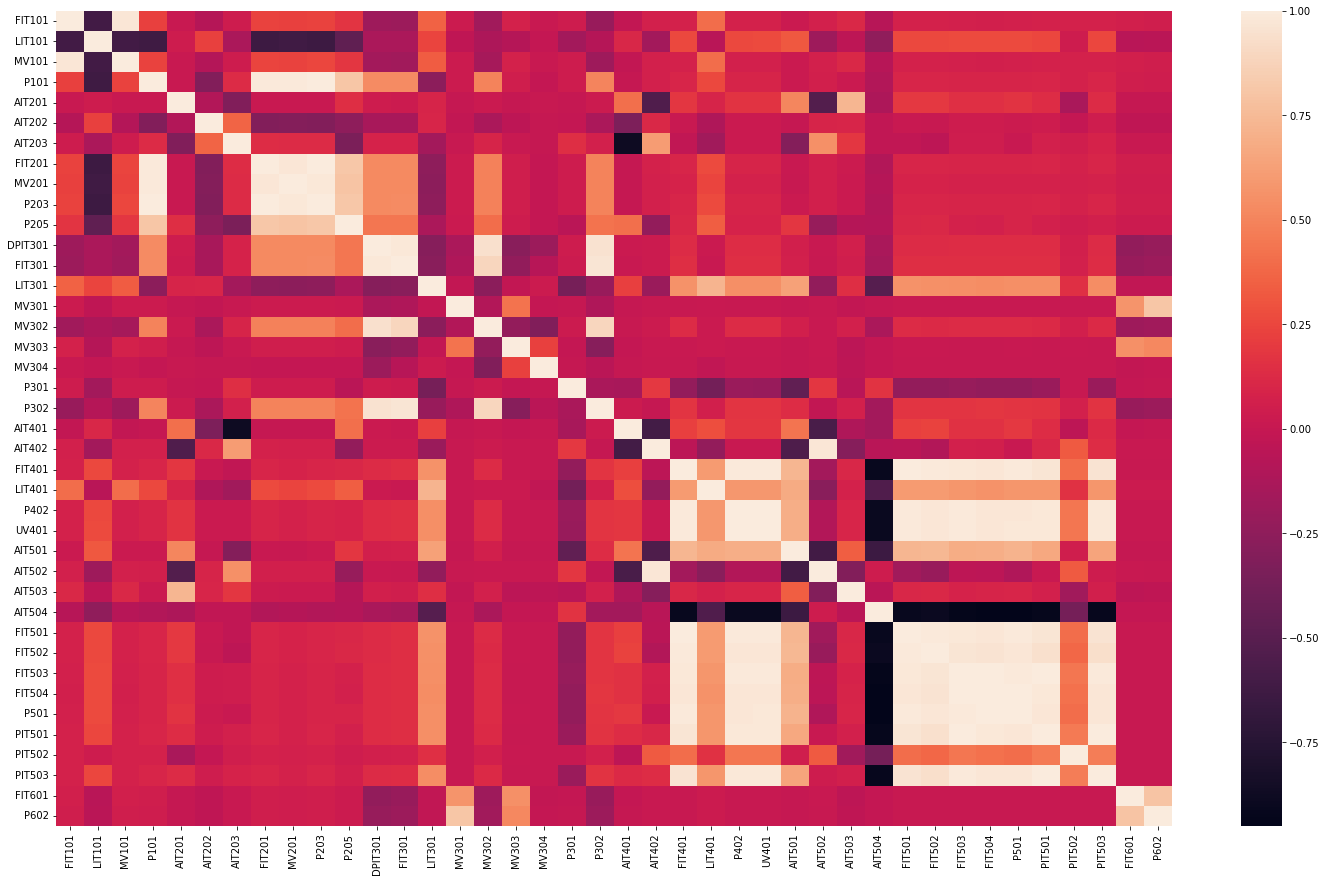

In [5]:
plt.figure(figsize=(25, 15))
sns.heatmap(df.corr())
plt.show()

#### Observing temporal behavior

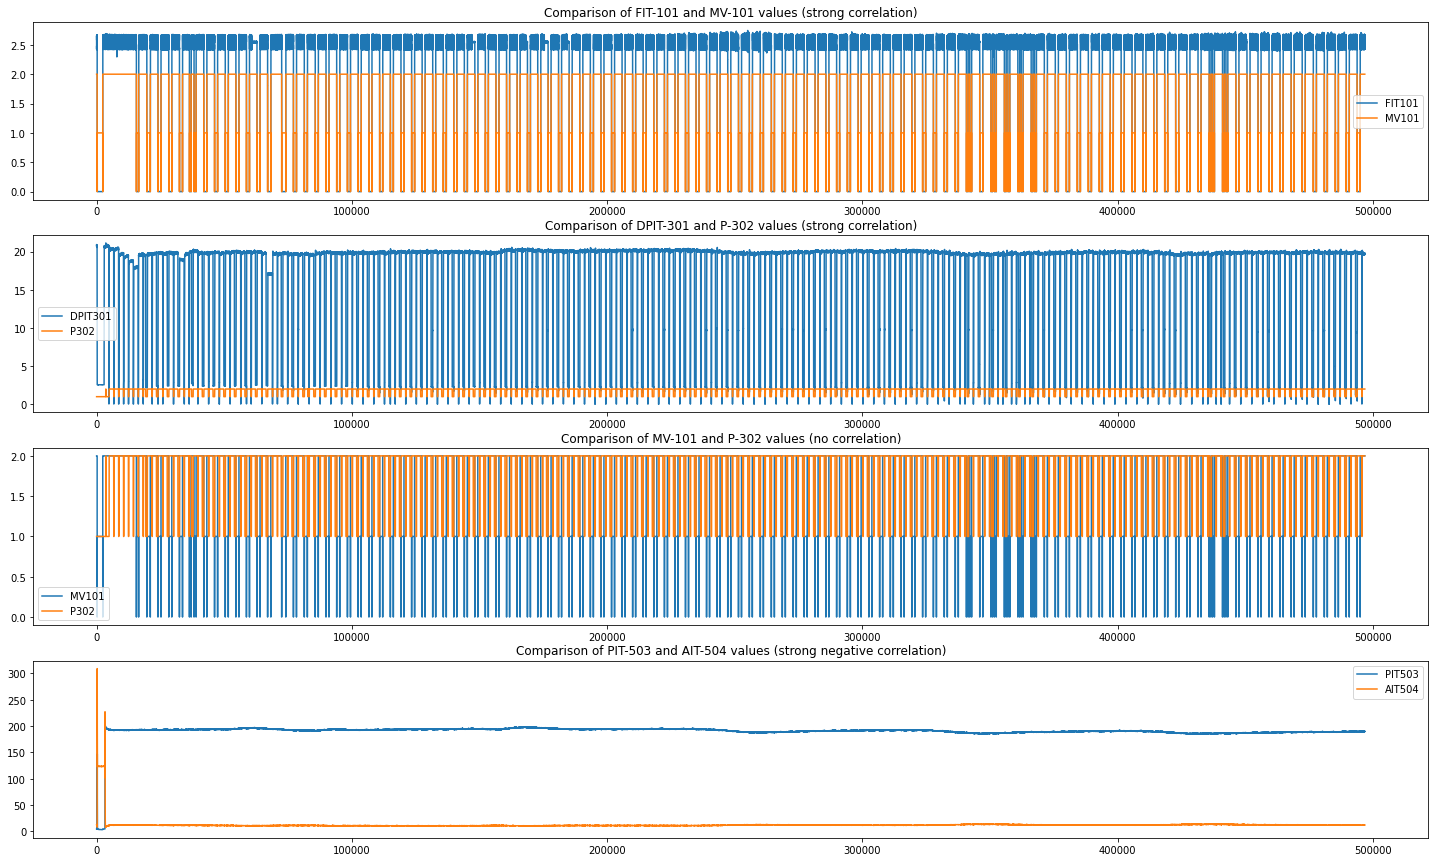

In [6]:
_, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(25, 15))
df.plot(ax=ax1, y=['FIT101', 'MV101'], legend=True, title='Comparison of FIT-101 and MV-101 values (strong correlation)')
df.plot(ax=ax2, y=['DPIT301', 'P302'], legend=True, title='Comparison of DPIT-301 and P-302 values (strong correlation)')
df.plot(ax=ax3, y=['MV101', 'P302'], legend=True, title='Comparison of MV-101 and P-302 values (no correlation)')
df.plot(ax=ax4, y=['PIT503', 'AIT504'], legend=True, title='Comparison of PIT-503 and AIT-504 values (strong negative correlation)')
plt.show()

#### Determining potentially abnormal features in the validation set

In [7]:
df_val = pd.read_csv("data/val_data.csv")[0:25000]

df_val_features = df_val.drop(columns=['Id', 'Timestamp'])
#df≈_val_features['Label'] *= -100
df_val_features['Label'].unique()

array([0, 1])

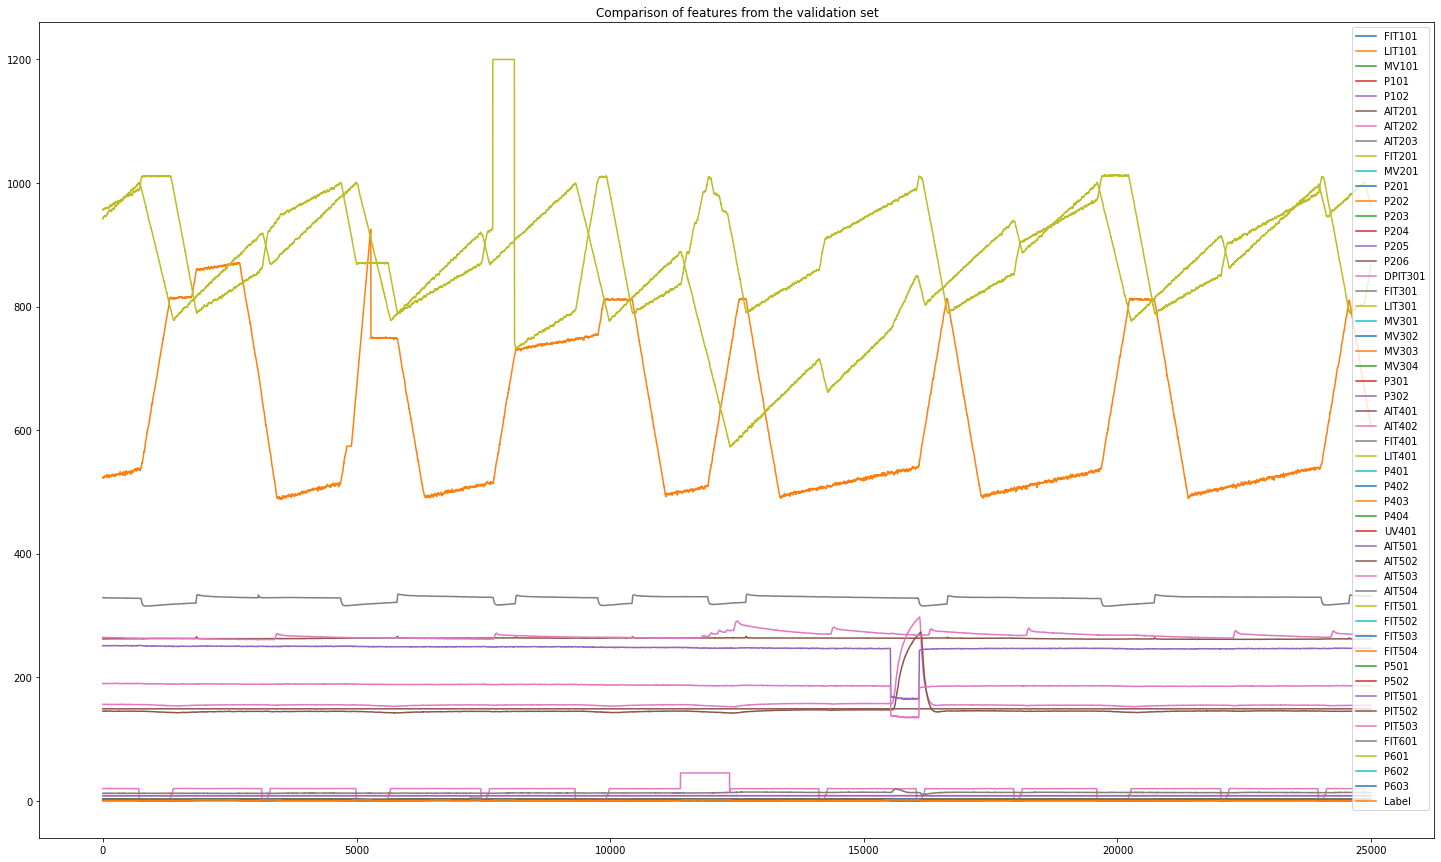

In [8]:
_, ax = plt.subplots(1, 1, figsize=(25, 15))
plt.plot(df_val_features)
ax.legend(labels=df_val_features.columns, loc='upper right')
ax.set_title('Comparison of features from the validation set')
plt.show()

### 1b. Answers to the three questions

#### What types of signals are there?

The data set contains two types of signals, coming from actuators and sensors.
Some data is represented as numerical values (type `float64`) while the others are integers (`int64`) and sometimes can be seen as category labels ()

#### Are the signals correlated? Do they show cyclic behavior?

Looking at the heatmap we can identify certain pairs of features with strong correlation (for instance FIT-101 and MV-101).
Several features seem to show strongly repetitive behavior overtime (eg. DPIT-301 and P-302).
Some feature (eg. P-201 and P-202) take only one value in the data set, which is why they are represented as white strips on the heatmap.
There are exceptions as well - for example the PIT-503 and the values it is correlated with (eg. FIT-401) seems to revolve around certain value, but do not seem to have any specific cyclic behavior.

In the beginning the behavior of the system is highly irregular for all the features.
The reason might be the fact that the system might have been initializing then.
For this reason it might be beneficial to prune the first 40000 entries before training the anomaly detection machine learning algorithms.

## 2. LOF task – Individual

*Author: Konrad Ponichtera*

/var/folders/q0/l_nfq0f150jd0mh72n5gypp40000gn/T/ipykernel_1123/12146464.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


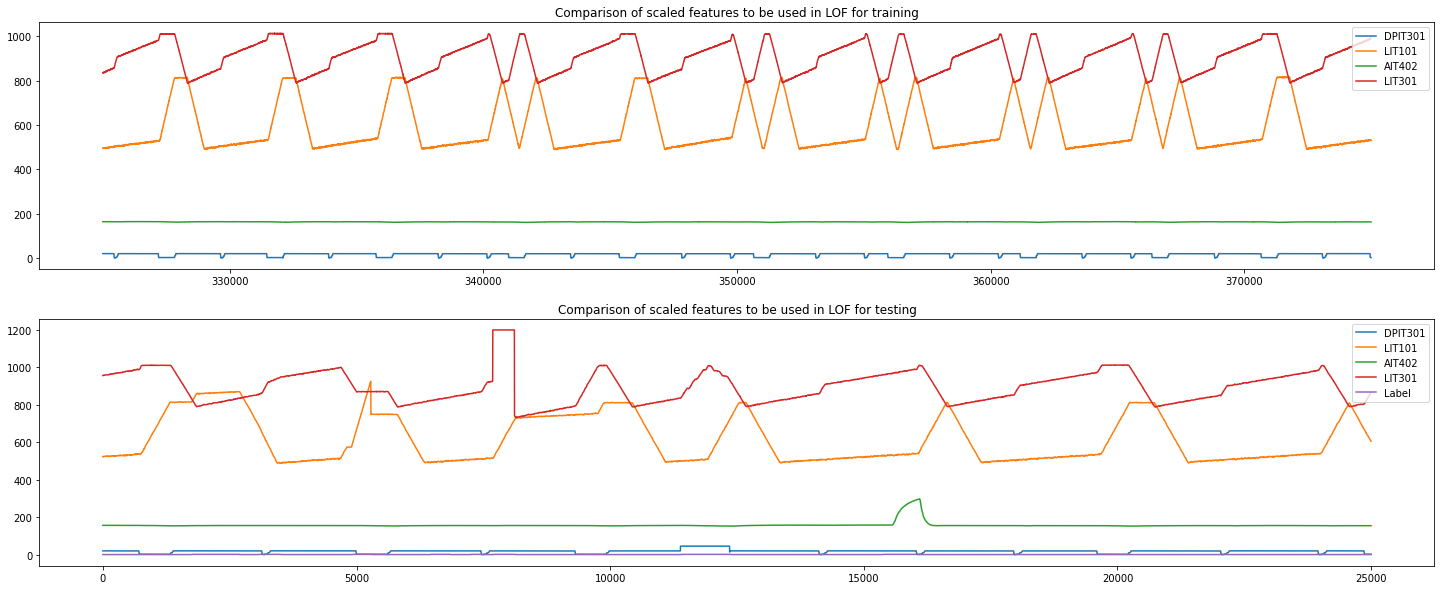

In [9]:
features = ['DPIT301', 'LIT101', 'AIT402', 'LIT301']
features_for_plot = features + ['Label']

X_train = df[features][325000:375000]
y_train = df_val_features[features]
y_train_for_plot = df_val_features[features_for_plot]

#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train.copy())

#scaler = StandardScaler()
#y_train_scaled = scaler.fit_transform(y_train.copy())

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(25, 10))
ax1.plot(X_train)
ax1.legend(labels=features)
ax1.set_title('Comparison of scaled features to be used in LOF for training')
ax2.plot(y_train_for_plot)
ax2.legend(labels=features_for_plot)
ax2.set_title('Comparison of scaled features to be used in LOF for testing')
fig.show()

### 2a. Plot LOF scores

In [10]:
clf = LocalOutlierFactor(n_neighbors=20, novelty=True, metric='cosine', n_jobs=-1)
clf.fit(X_train)

LocalOutlierFactor(metric='cosine', n_jobs=-1, novelty=True)

In [11]:
X_scores = clf.score_samples(y_train)
X_scores *= -1

/Users/ionbabalau/uni/q4/cs4035-cda/lab2/.venv/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


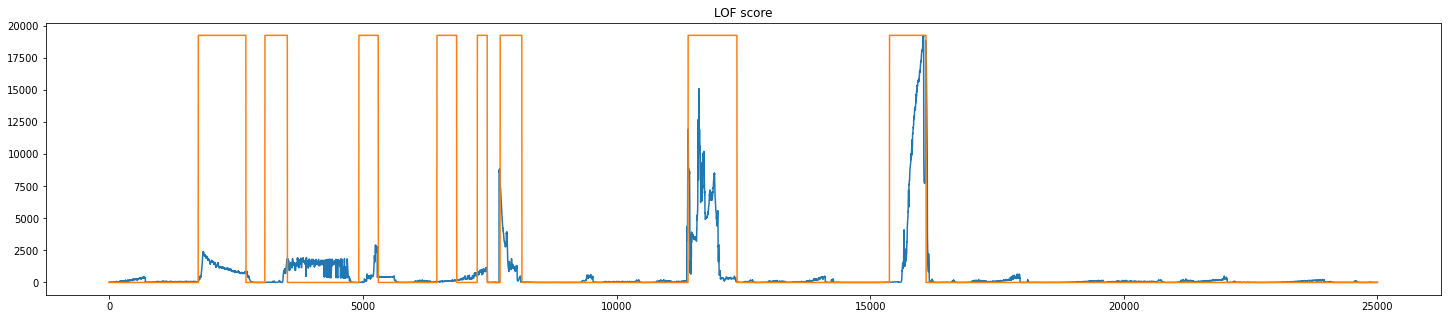

In [12]:
anomaly = pd.DataFrame({"LOF score": X_scores, "Anomaly": df_val['Label'] * X_scores.max()})

_, ax = plt.subplots(1, 1, figsize=(25, 5))
plt.plot(anomaly)
ax.set_title('LOF score')
plt.show()

### 2b. Analysis and answers to the questions

## 3. PCA task – Ion

### 3a. Plot PCA residuals

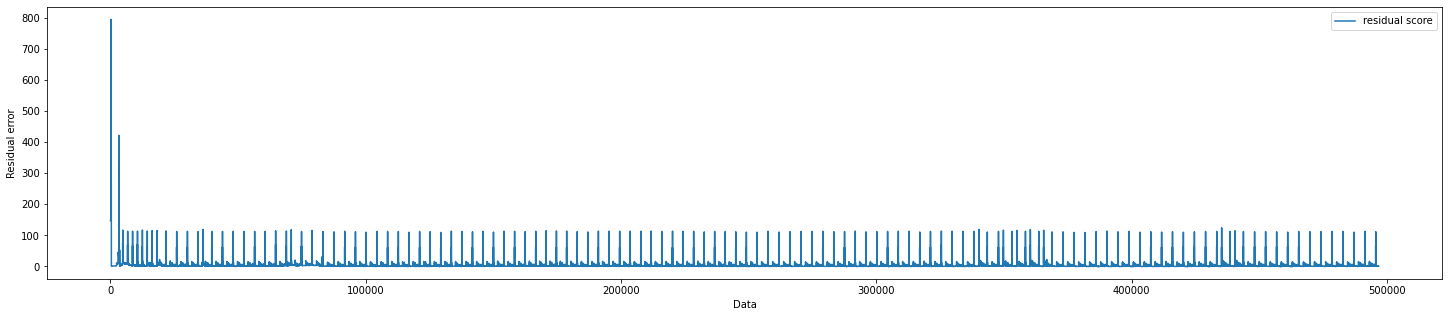

In [193]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score

plt.rcParams["figure.figsize"] = (25,5)

# calculate residuals using squared error function
def calc_residuals(original_arr, reconstructed_arr):
    return pd.Series(data=np.sum(np.square(np.asarray(original_arr) - np.asarray(reconstructed_arr)), axis=1), index=original_arr.index)

# apply pca, calculate and return residuals
def apply_pca(df, n_comp):
    pca = PCA(n_components=n_comp, random_state=0)
    pca.fit(df)
    df_pca = pd.DataFrame(pca.transform(df))
    df_inverse = pd.DataFrame(pca.inverse_transform(df_pca))
    return pca, calc_residuals(df, df_inverse)

def plot_res(residuals):
    plt.plot(residuals, label='residual score')
    plt.xlabel('Data')
    plt.ylabel('Residual error')
    plt.legend()
    plt.show()

df = pd.read_csv("data/train_data.csv")
# drop unecessary columns
df = df.drop(columns=['Id', 'Timestamp', 'Label'], errors='ignore')
for col in df.columns:
    if len(df[col].unique()) == 1:
        df = df.drop(columns=[col])

# scale data
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.to_numpy()), columns=df.columns)

_, residuals = apply_pca(df_scaled, 0.95) 
plot_res(residuals)

In order to use PCA for anomaly detection, we first remove some uncessary columns from the train dataset and scale the values. We then use PCA with a a number of components that achieves an explained variance of 95%. Then we calculate the residuals using squared error and plot them.

As can be seen from the plot, the data in the beginning is highly irregular, probably due to the system booting up. Thus, we decide to remove it from the training set.

relevant columns 40


/Users/ionbabalau/uni/q4/cs4035-cda/lab2/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


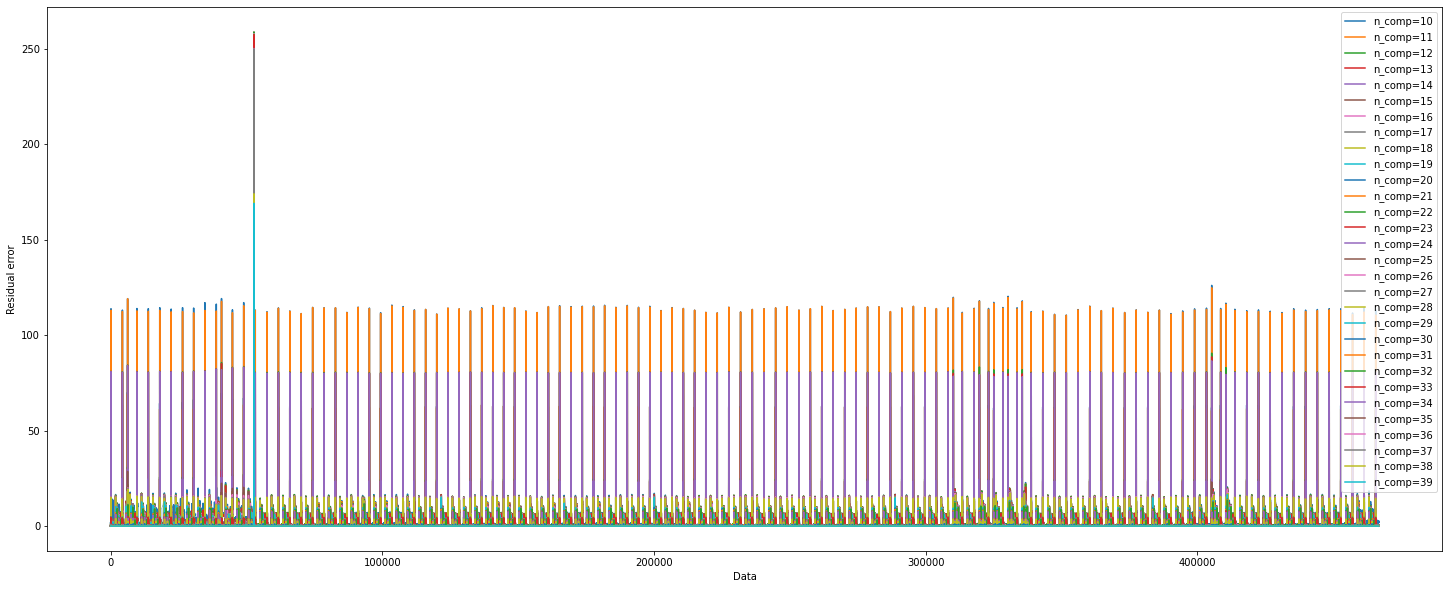

In [118]:
df_train = df_scaled.copy()[30000:]
df_train = df_train.reset_index(drop=True)
print('relevant columns', len(df_train.columns))
# now repeat the experiment with various number of components
max_height = 100
plt.figure(figsize=[25,10])
for i in range(10,len(df_train.columns)):
    _, res = apply_pca(df_train, i)
    # scale residuals
    #res = [max_height if x > max_height else x for x in res]
    plt.plot(res, label='n_comp=' + str(i))
plt.xlabel('Data')
plt.ylabel('Residual error')
plt.legend()
plt.show()

We can see that as low as with 11 components, we can detect some anomalies already.

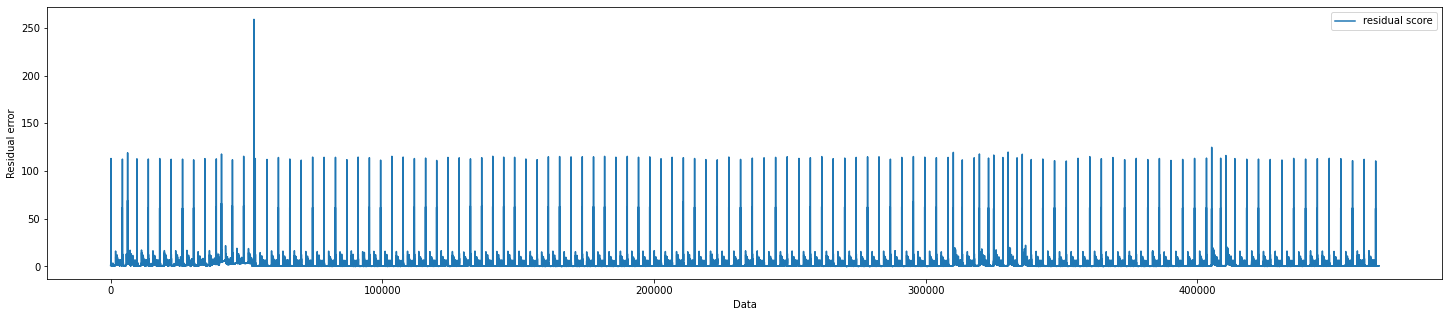

In [119]:
n_comp = 11
pca, residuals = apply_pca(df_train, n_comp)
plot_res(residuals)

Next we choose a threshold of 116 and plot the anomalies again.

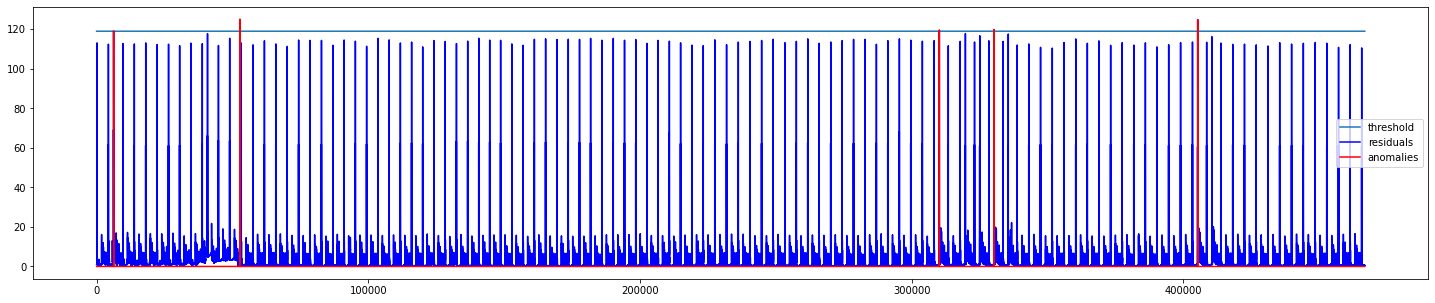

In [122]:
max_size = 125
threshold = 119
# downscale large anomalies
scaled_residuals = [max_size if x >= max_size else x for x in residuals]
anomalies = [x if x > threshold else 0 for x in scaled_residuals]
plt.plot([threshold] * len(scaled_residuals), label='threshold')
plt.plot(scaled_residuals, 'b', label='residuals')
plt.plot(anomalies, 'r', label='anomalies')
plt.legend()
plt.show()

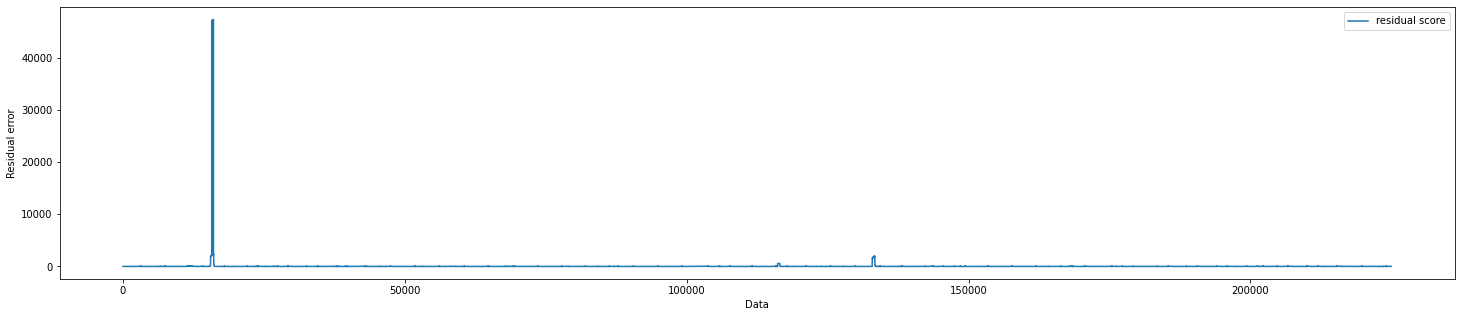

In [123]:
# evaluate on val dataset using previously fitted pca
df_val = pd.read_csv("data/val_data.csv")
y_true = df_val['Label']
# keep same columns as in training set
for col in df_val.columns:
    if col not in df_train.columns:
        df_val = df_val.drop(columns=col)
df_val = pd.DataFrame(scaler.fit_transform(df_val.to_numpy()), columns=df_val.columns)

df_pca = pd.DataFrame(pca.transform(df_val))
df_inverse = pd.DataFrame(pca.inverse_transform(df_pca))
residuals = calc_residuals(df_val, df_inverse)
plot_res(residuals)

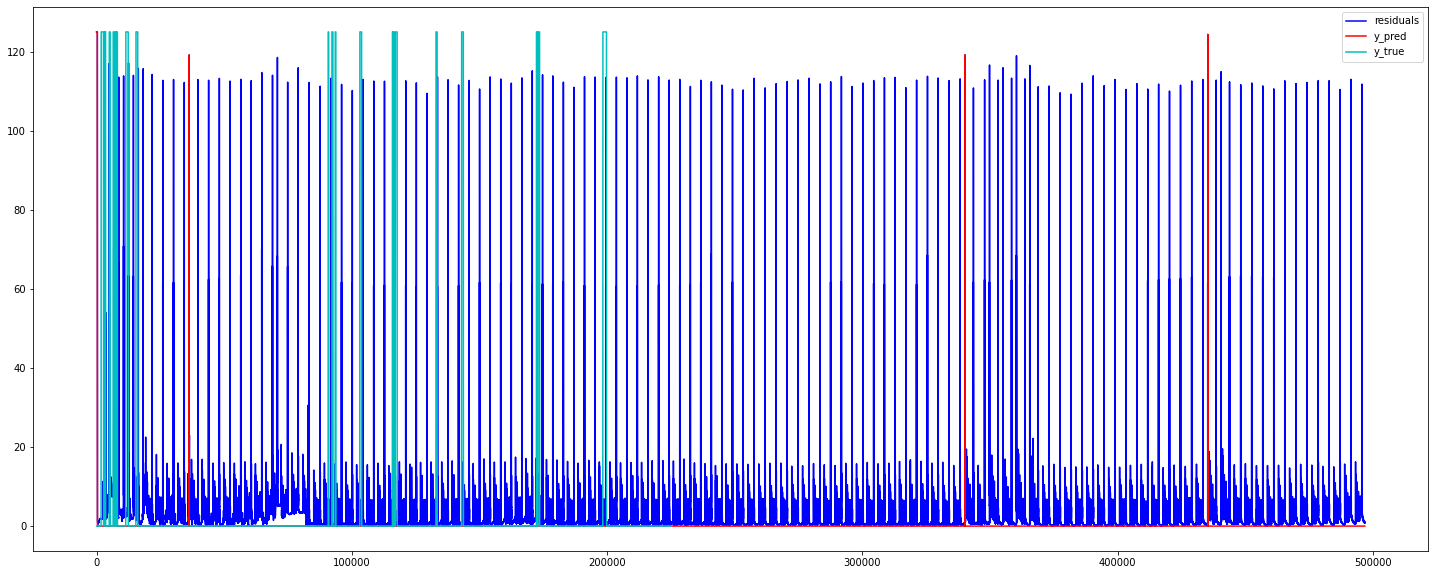

In [295]:
threshold = 119
max_size = 125
# downscale residuals
scaled_residuals = [max_size if x >= max_size else x for x in residuals]
anomalies = [x if x > threshold else 0 for x in scaled_residuals]
plt.figure(figsize=[25,10])
plt.plot(scaled_residuals, 'b', label='residuals')
plt.plot(anomalies, 'r', label='y_pred')
plt.plot(y_true * np.max(anomalies), 'c', label='y_true')
plt.legend()
plt.show()

F1 score 0.2459526774595268


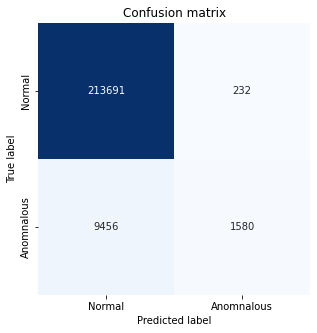

In [132]:
def plot_cm(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    labels = ['Normal', 'Anomnalous']
    mat = [[tn, fp], [fn, tp]]
    plt.figure(figsize=[5,5])
    plt.title('Confusion matrix')
    sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
                xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    return tp, fp, f1_score(y_true, y_pred)

y_pred = [1 if x > 1 else 0 for x in anomalies]
tp, fp, f1 = plot_cm(y_true, y_pred)
print('F1 score', f1)


In [ ]:
predictions = []

predictions = [1 if x > threshold else 0 for x in scores]
unique, counts = np.unique(predictions, return_counts=True)
print(dict(zip(unique, counts)))

df_predictons = pd.DataFrame({'Id': ids, 'Label': predictions})
print(len(df_predictons['Id'].values))
df_predictons.to_csv('data/submission.csv', index=False)


### 3b. Analysis and answers to the questions

PCA is useful for anomaly deteciton, because anomalous data points will have a higher residual score than normal ones.

Because we look at every data point indepetendly, we can say that PCA detects point anomalies.


## 4. Regression task – Ion

### 4a. Print relevant plots and/or metrics to determine the parameters.

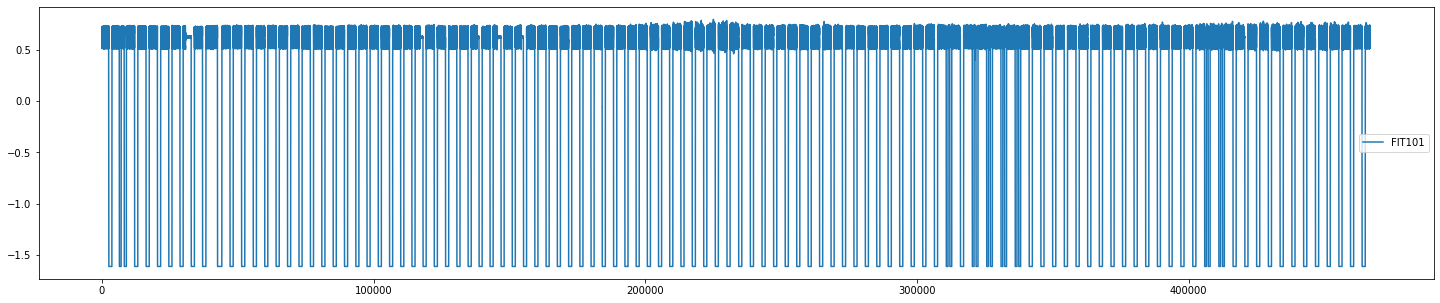

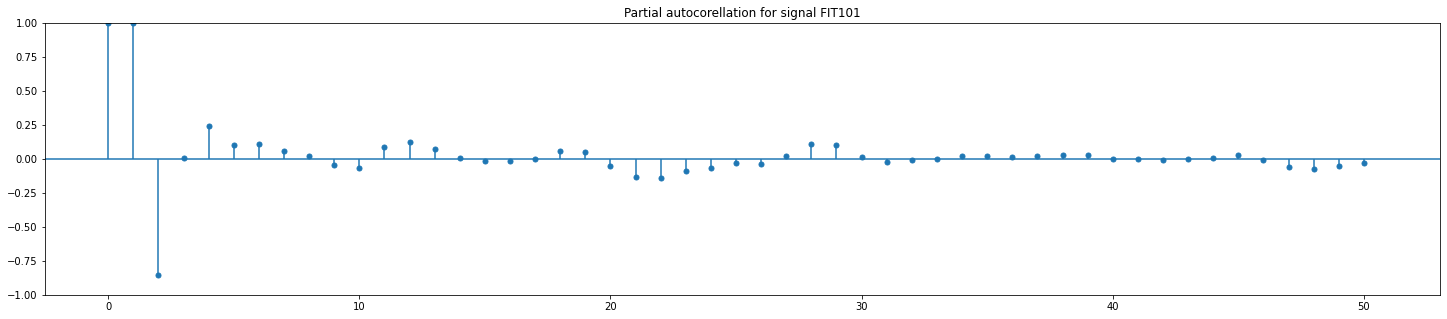

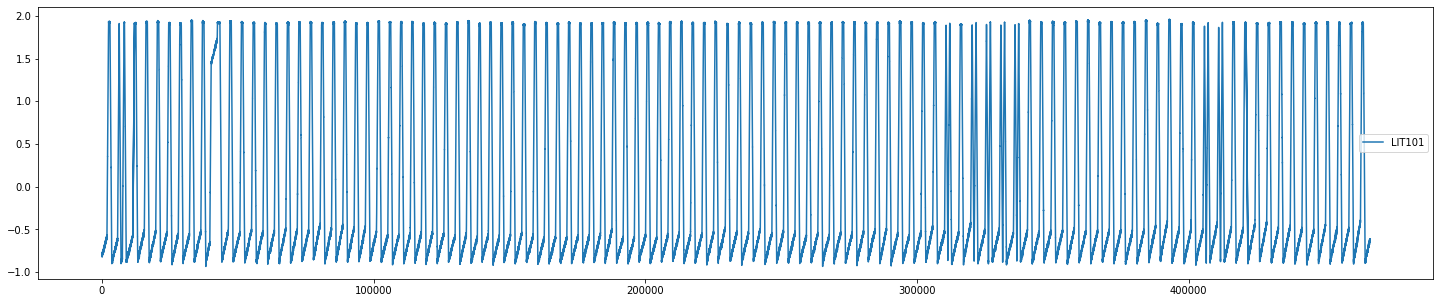

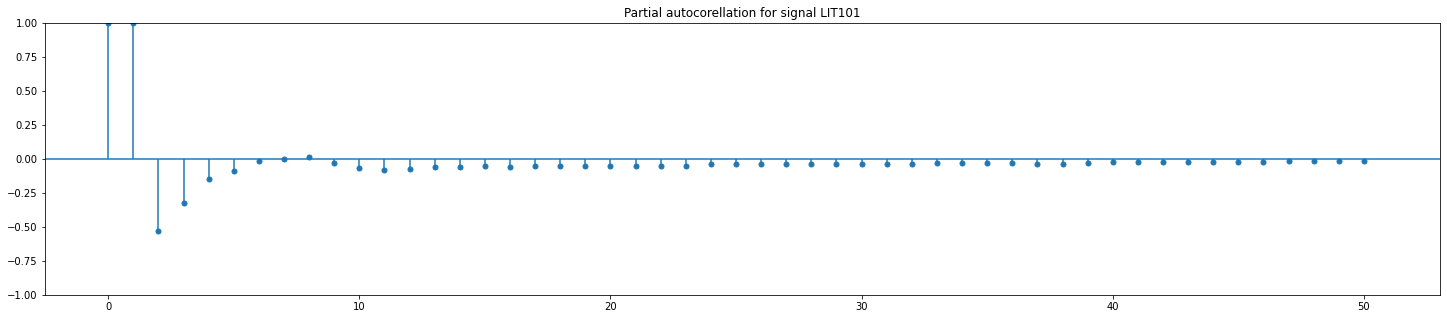

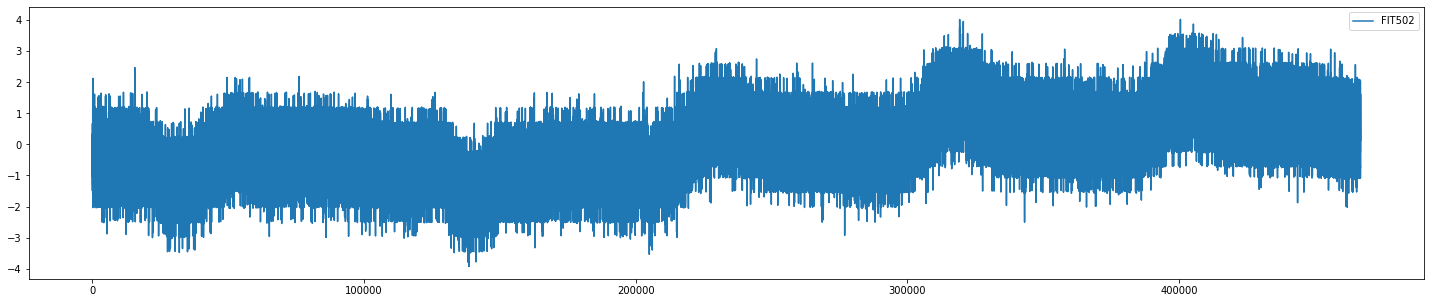

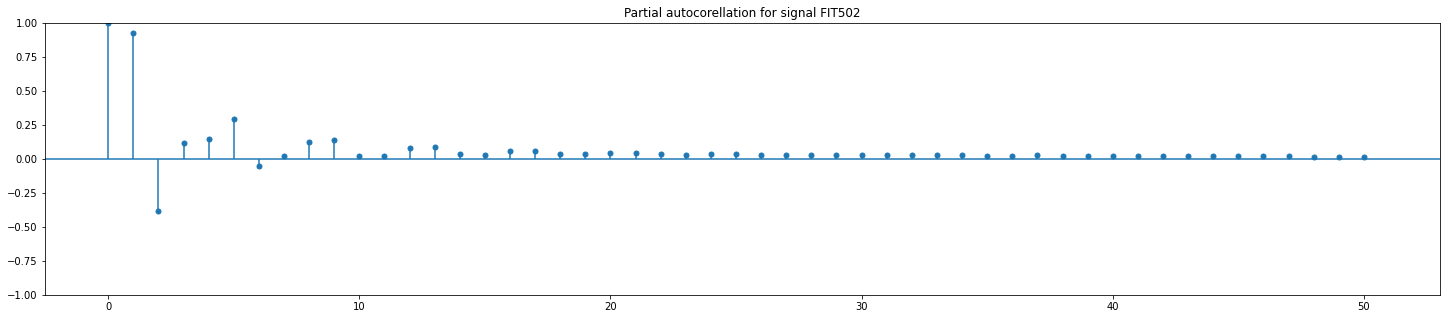

In [194]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from sklearn.preprocessing import StandardScaler
plt.rcParams["figure.figsize"] = (25,5)

# prepare data
df_train = pd.read_csv("data/train_data.csv")[30000:]
df_train = df_train.drop(columns=['Id', 'Label', 'Timestamp'])
df_val = pd.read_csv("data/val_data.csv")
labels = df_val['Label']
df_val = df_val.drop(columns=['Id', 'Timestamp', 'Label'])
signals = ['FIT101', 'LIT101', 'FIT502']

scaler = StandardScaler()
scaler.fit(df_train)
df_train = pd.DataFrame(scaler.transform(df_train), columns=df_train.columns)
df_val = pd.DataFrame(scaler.transform(df_val), columns=df_val.columns)

# plot signals and pacf
for signal in signals:
    series = df_train[signal].to_numpy()
    plt.plot(series, label=signal)
    plt.legend()
    plt.show()
    fig, ax = plt.subplots(figsize=(25, 5))
    plot_pacf(series, lags=50, ax=ax, method='ywm')
    plt.title('Partial autocorellation for signal ' + signal)
    plt.show()

We choose three different signals which show interesting behaviour and plot their partial autocorelation (PACF).
PACF describes the direct relationship between an observation and its lagged counterpart. So chosing a window lenght which corresponds to a positive PACF should result in better predictions.

For FIT101, we will experiment with window sizes 4 and 10.
The PACF for the LIT101 signal is is mostly negative, except for 8 when it is close to 0. Thus, we will use a window size of 8 for that signal.
Lastly for FIT502, we will choose window size 5.

In [274]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import confusion_matrix, f1_score

def prepare_data(df_train, df_val, signal, window, use_diff):
    if use_diff:
        series = df_train[signal].diff().to_numpy()
    else:
        series = df_train[signal].to_numpy()
    series = series[np.logical_not(np.isnan(series))]
    val_series = df_val[signal].to_numpy()

    # X will be a matrix of size [n_samples, window_size]
    X_train = []
    for i in range(window, len(series)):
        X_train.append(series[i - window:i])
    y_train = series[window:]

    X_test = []
    for i in range(window, len(val_series)):
        X_test.append(val_series[i - window:i])
    y_test = val_series[window:]
    return X_train, y_train, X_test, y_test

def calc_residuals(original_arr, reconstructed_arr):
    return pd.Series(data=np.square(original_arr - reconstructed_arr))

def plot_cm(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    labels = ['Normal', 'Anomnalous']
    mat = [[tn, fp], [fn, tp]]
    _, ax = plt.subplots(1, 1, figsize=(5, 5))
    ax.set_title('Confusion matrix')
    sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
                xticklabels=labels, yticklabels=labels, ax=ax)
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')
    return tp, fp, f1_score(y_true, y_pred)

def lin_regression(signal, window, scale_factor, use_diff):
    X_train, y_train, X_test, y_test = prepare_data(df_train, df_val, signal, window, use_diff)
    reg = LinearRegression()
    reg.fit(X_train, y_train)
    # predict on validation data
    y_true = labels[window:]
    predictions = reg.predict(X_test)
    residuals = calc_residuals(y_test, predictions)
    # upscale residuals to better see the error
    thres = 10
    res_scaled = [thres if x * scale_factor > thres else x * scale_factor for x in residuals]
    y_pred = [1 if x == thres else 0 for x in res_scaled]
    _, ax = plt.subplots(1, 1, figsize=(25, 5))
    ax.plot(res_scaled, label='residual error')
    ax.plot(y_true * thres, 'c', label='y_true')
    ax.plot(y_pred, 'r', label='y_pred')
    ax.legend()
    _, _, f1 = plot_cm(y_true, y_pred)
    print('F1 score', f1)


### 4b. Plots to study the detected anomalies

F1 score 0.00018117583114412537
F1 score 0.0


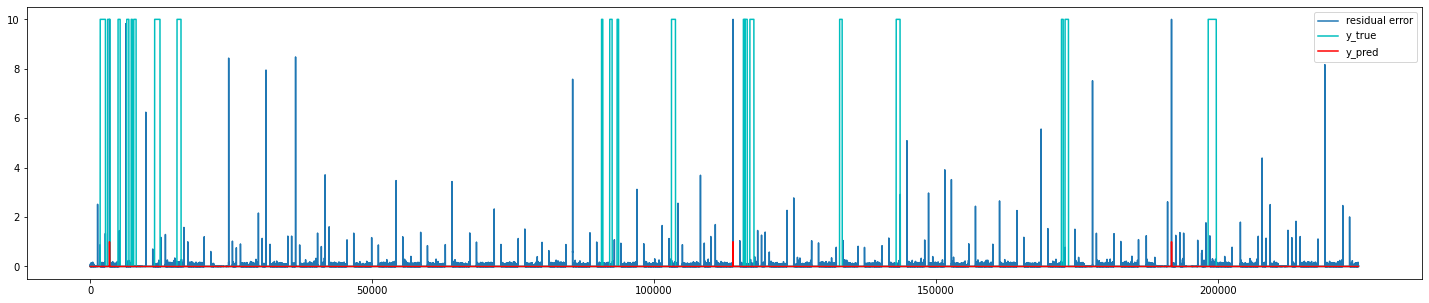

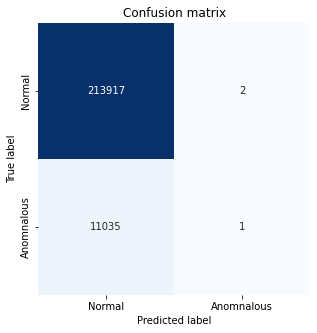

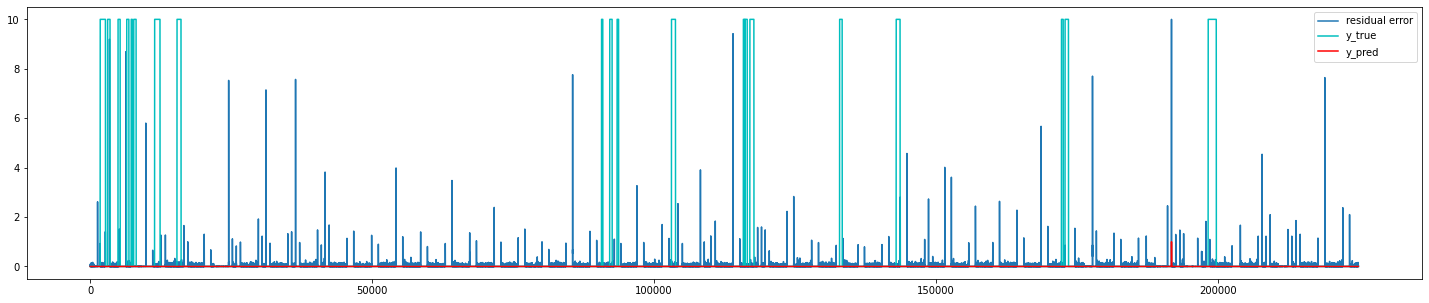

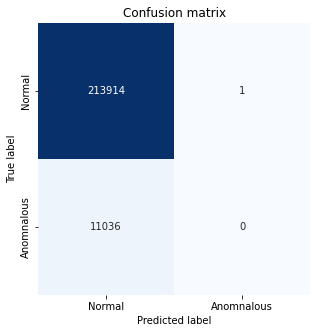

In [282]:
signal = signals[0]

# positive pacf example, no differencing
lin_regression(signal, 4, 80, False)
# negative pacf example, no differencing
lin_regression(signal, 8, 80, False)

For detecting anomalies using linear regression, we first choose a window size, then create the training and validation data.
Our window size is 4, so we will use 4 sesor samples to predict the fifth one.

After training the regressor, we make predictions on the validation set, and calculate the error between the original and predicted values, which will be our residual error. Then we scale it with a custom factor for easier visualization, and set a threshold which we will use to clasify anomalies. We then plot the true anomalies, predicted anomalies, and the residual error, as well as the confusion matri.

As can be seen, the perofmance of the regressor for the first signal FIT101 is not that great, hardly detecting any anomalies.

F1 score 0.0


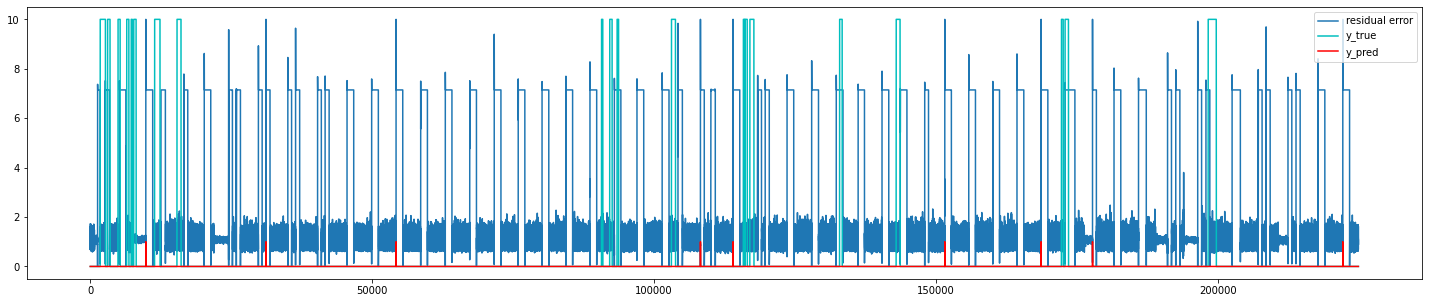

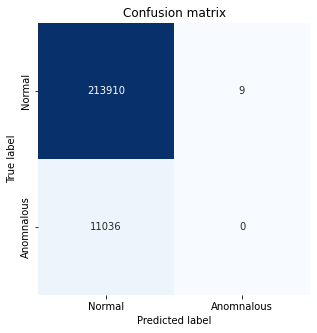

In [289]:
# positive pacf example, with differencing
lin_regression(signal, 4, 70, True)

We then repeat the experiment for window size 4, but with differencing applied, making the series more stationary.

This leads to more true positives, but also a lot more false positives.

F1 score 0.0025337073568002895


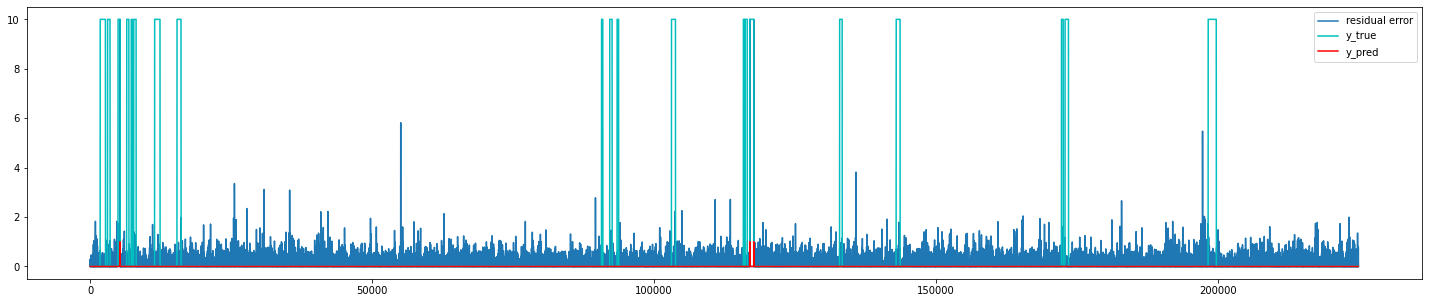

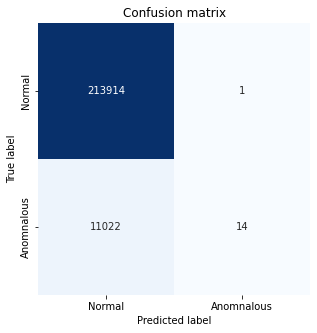

In [290]:
signal = signals[1]

lin_regression(signal, 8, 10000, False)

F1 score 0.037642045454545456


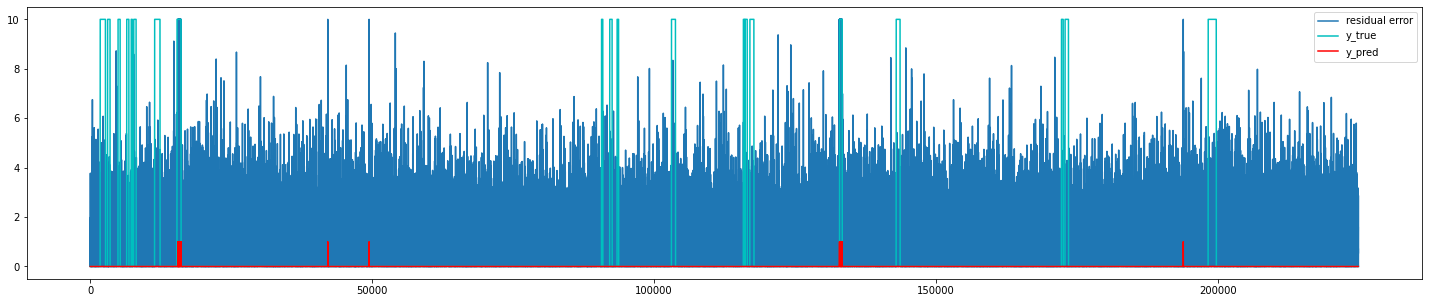

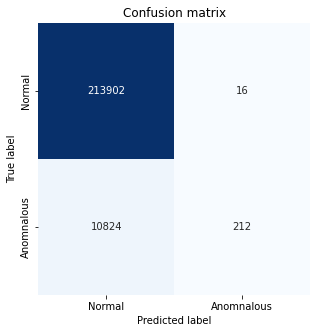

In [294]:
signal = signals[2]

lin_regression(signal, 5, 5, False)

### 4c. Analysis and answers to the questions

In conclusion, the linear regressor with a sliding window is not a good method of anomaly detection.

We have experimented with serveral types of signals and window sizes, the last one signal having the best performance.

## 5. N-gram task – 1/2 A4 - Individual

### 5a. Visualise discretization

### 5b. Analysis and answers to the questions. Also provide relevant plots.

## 6.Comparision task 1 A4 - Individual

### 6a. Use the given guidelines and provide a comparision of the above implemented methods.

## 7. Bonus Task 1 A4

### 7a. Provide implementation and analysis.